#Relatório do Processo de ETL com Dados da RAIS


## Contexto

Durante o processo de análise de dados para um projeto focado na Região Norte do Brasil, foram realizadas diversas operações no banco de dados MySQL e análises com o auxílio de ferramentas de desenvolvimento e inteligência artificial, incluindo ChatGPT 3.5, ChatGPT 4.0, Google Colab e Jupyter Notebook. Este relatório resume os passos realizados, os desafios encontrados e as soluções adotadas para superá-los, bem como apresenta os insights obtidos a partir das análises realizadas.

## Problemas Encontrados e Soluções Adotadas

### 1. Reconstrução das Tabelas no Banco de Dados

#### Desafio:
Inicialmente, houve um conflito entre o banco de dados e a estrutura dos dados importados. A estrutura das tabelas criadas no banco não correspondia adequadamente às colunas presentes nos dados, o que causou incompatibilidades.

#### Solução:
Para resolver esse problema, todas as colunas das tabelas foram deletadas e recriadas, desta vez seguindo fielmente a estrutura das colunas presentes nos dados importados. Essa abordagem garantiu a correta correspondência entre os dados e o esquema do banco de dados.

### 2. Conflito em Coluna Específica e Análise de Necessidade

#### Desafio:
Encontrou-se um conflito com uma coluna específica no banco de dados. Foi necessário avaliar sua relevância para as análises pretendidas.

#### Solução:
Após verificar que a coluna conflitante não era essencial para as análises em questão, optou-se por prosseguir sem a necessidade de ajustes adicionais para essa coluna, permitindo a continuidade do trabalho sem atrasos significativos.

### 3. Problemas de Desconexão do Servidor

#### Desafio:
Foram enfrentados problemas de desconexão com o servidor, provavelmente devido ao volume de consultas realizadas.

#### Solução:
A estratégia adotada para contornar esse problema foi a quebra do volume das consultas em partes menores, permitindo a execução estável das operações no banco de dados sem sobrecarregar a conexão.

## Ferramentas Utilizadas e Justificativas

- **MySQL**: Escolhido por ser o sistema de gerenciamento de banco de dados já instalado e familiar ao usuário. A limitação de espaço de armazenamento inviabilizou a instalação de alternativas como PostgreSQL.
  
- **ChatGPT 3.5 e ChatGPT 4.0**: Utilizados para estruturar códigos SQL necessários às consultas e para apoio na verificação de erros e análise de dados. A versão 4.0 ofereceu insights avançados e auxílio na solução de problemas específicos encontrados durante o processo.
  
- **Google Colab e Jupyter Notebook**: Inicialmente, tentou-se utilizar o Google Colab para as análises, mas restrições de conexão com o banco de dados local levaram à escolha do Jupyter Notebook. O Jupyter Notebook foi utilizado para análises pós-processamento dos dados, devido à sua flexibilidade e integração com bibliotecas Python para análise de dados.

## Análises Realizadas

### Análise 1: Principais Atividades Econômicas na Região Norte

Identificou-se as cinco principais atividades econômicas que mais empregam na Região Norte, com destaque para a atividade com código DIV_CNAE_20 = 10, liderando com 70.135 empregados.

### Análise 2: Municípios com Maior Emprego na Região Norte

Foram destacados os cinco municípios com maior número de empregados ativos, evidenciando a concentração de empregos e a importância econômica dessas localidades para a região.

## Conclusão

O processo de análise de dados enfrentou desafios relacionados à estruturação do banco de dados, análise de necessidades de colunas específicas e problemas técnicos como desconexões. Através da utilização estratégica de ferramentas e soluções criativas, foi possível superar esses obstáculos e obter insights valiosos sobre o emprego na Região Norte do Brasil. Este projeto evidencia a importância da flexibilidade, da escolha

 adequada de ferramentas e da capacidade de adaptação diante de desafios na área de engenharia de dados.

#Processo de ETL com Dados da RAIS

In [ ]:
import pandas as pd

caminho_do_arquivo = 'C:/Users/root/Desktop/ProcessoSeletivoDataViva/RAIS_VINC_PUB_NORTE.txt'

try:
    dados = pd.read_csv(caminho_do_arquivo, sep=';', encoding='latin1', low_memory=False)
    print('Arquivo lido com sucesso!')
except Exception as e:
    print(f'Erro ao ler o arquivo: {e}')

Arquivo lido com sucesso!


In [ ]:
print(dados.columns)

Index(['Bairros SP', 'Bairros Fortaleza', 'Bairros RJ', 'Causa Afastamento 1',
       'Causa Afastamento 2', 'Causa Afastamento 3', 'Motivo Desligamento',
       'CBO Ocupação 2002', 'CNAE 2.0 Classe', 'CNAE 95 Classe',
       'Distritos SP', 'Vínculo Ativo 31/12', 'Faixa Etária',
       'Faixa Hora Contrat', 'Faixa Remun Dezem (SM)',
       'Faixa Remun Média (SM)', 'Faixa Tempo Emprego',
       'Escolaridade após 2005', 'Qtd Hora Contr', 'Idade',
       'Ind CEI Vinculado', 'Ind Simples', 'Mês Admissão', 'Mês Desligamento',
       'Mun Trab', 'Município', 'Nacionalidade', 'Natureza Jurídica',
       'Ind Portador Defic', 'Qtd Dias Afastamento', 'Raça Cor',
       'Regiões Adm DF', 'Vl Remun Dezembro Nom', 'Vl Remun Dezembro (SM)',
       'Vl Remun Média Nom', 'Vl Remun Média (SM)', 'CNAE 2.0 Subclasse',
       'Sexo Trabalhador', 'Tamanho Estabelecimento', 'Tempo Emprego',
       'Tipo Admissão', 'Tipo Estab', 'Tipo Estab.1', 'Tipo Defic',
       'Tipo Vínculo', 'IBGE Subsetor', 'Vl 

Filtrar e eliminar da base todos os registros em que a variável “EMP EM 31/12” apresente valor igual a 0 (zero). Ou seja, essa variável indica aquelas pessoas que estavam empregadas ou não no dia 31/12 do ano em questão, ao eliminar os casos iguais a 0, estamos retirando da base quem não estava empregado em 31/12.

In [ ]:
dados_filtrados = dados[dados['Vínculo Ativo 31/12'] != 0]
print(f'Registros antes da filtragem: {len(dados)}, após filtragem: {len(dados_filtrados)}')

Registros antes da filtragem: 3977463, após filtragem: 2808709


A partir da variável “CLAS CNAE 20”, criar uma nova variável chamada “DIV CNAE 20” que corresponde aos dois primeiros dígitos da variável “CLAS CNAE 20”. Isso criará uma nova variável para indicar o código de uma atividade econômica.

In [ ]:
dados_filtrados['DIV CNAE 20'] = dados_filtrados['CNAE 2.0 Classe'].astype(str).apply(lambda x: x[:2] if pd.notnull(x) else x)
print('Nova variável criada com sucesso!')

Nova variável criada com sucesso!


C:\Users\root\AppData\Local\Temp\ipykernel_13452\2896376558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['DIV CNAE 20'] = dados_filtrados['CNAE 2.0 Classe'].astype(str).apply(lambda x: x[:2] if pd.notnull(x) else x)


In [ ]:
print(dados_filtrados.dtypes)

Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Causa Afastamento 1       int64
Causa Afastamento 2       int64
                          ...  
Vl Rem Novembro SC       object
Ano Chegada Brasil        int64
Ind Trab Intermitente     int64
Ind Trab Parcial          int64
DIV CNAE 20              object
Length: 61, dtype: object


In [ ]:
max_length_bairros_sp = dados_filtrados['Bairros SP'].astype(str).map(len).max()
max_length_bairros_fortaleza = dados_filtrados['Bairros Fortaleza'].astype(str).map(len).max()
max_length_bairros_rj = dados_filtrados['Bairros RJ'].astype(str).map(len).max()
max_length_div_cnae_20 = dados_filtrados['DIV CNAE 20'].astype(str).map(len).max()

print(f"Comprimento máximo para Bairros SP: {max_length_bairros_sp}")
print(f"Comprimento máximo para Bairros Fortaleza: {max_length_bairros_fortaleza}")
print(f"Comprimento máximo para Bairros RJ: {max_length_bairros_rj}")
print(f"Comprimento máximo para DIV CNAE 20: {max_length_div_cnae_20}")

Comprimento máximo para Bairros SP: 20
Comprimento máximo para Bairros Fortaleza: 20
Comprimento máximo para Bairros RJ: 20
Comprimento máximo para DIV CNAE 20: 2


In [ ]:
import unicodedata
import re

def limpar_nome_coluna(nome):

    nome_sem_acento = unicodedata.normalize('NFKD', nome).encode('ASCII', 'ignore').decode('ASCII')

    nome_limpo = re.sub(r'[^a-zA-Z0-9_]', '_', nome_sem_acento)
    return nome_limpo


dados_filtrados.columns = [limpar_nome_coluna(col) for col in dados_filtrados.columns]


In [ ]:
import re

def limpar_valor(valor):
    if isinstance(valor, str):
        valor_limpo = re.sub(r'[^0-9,]', '', valor)
        if valor_limpo:
            return float(valor_limpo.replace(',', '.'))
    return 0.0

In [ ]:
print(dados_filtrados.columns)

Index(['Bairros_SP', 'Bairros_Fortaleza', 'Bairros_RJ', 'Causa_Afastamento_1',
       'Causa_Afastamento_2', 'Causa_Afastamento_3', 'Motivo_Desligamento',
       'CBO_Ocupacao_2002', 'CNAE_2_0_Classe', 'CNAE_95_Classe',
       'Distritos_SP', 'Vinculo_Ativo_31_12', 'Faixa_Etaria',
       'Faixa_Hora_Contrat', 'Faixa_Remun_Dezem__SM_',
       'Faixa_Remun_Media__SM_', 'Faixa_Tempo_Emprego',
       'Escolaridade_apos_2005', 'Qtd_Hora_Contr', 'Idade',
       'Ind_CEI_Vinculado', 'Ind_Simples', 'Mes_Admissao', 'Mes_Desligamento',
       'Mun_Trab', 'Municipio', 'Nacionalidade', 'Natureza_Juridica',
       'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raca_Cor',
       'Regioes_Adm_DF', 'Vl_Remun_Dezembro_Nom', 'Vl_Remun_Dezembro__SM_',
       'Vl_Remun_Media_Nom', 'Vl_Remun_Media__SM_', 'CNAE_2_0_Subclasse',
       'Sexo_Trabalhador', 'Tamanho_Estabelecimento', 'Tempo_Emprego',
       'Tipo_Admissao', 'Tipo_Estab', 'Tipo_Estab_1', 'Tipo_Defic',
       'Tipo_Vinculo', 'IBGE_Subsetor', 'Vl_

# Conectando ao Banco

In [ ]:
!pip install sqlalchemy pymysql
from sqlalchemy import create_engine, text

usuario = 'root'
senha = '18031999'
host = '127.0.0.1'
porta = '3306'
database = 'ProcessoSeletivoDataViva'

connection_string = f"mysql+pymysql://{usuario}:{senha}@{host}:{porta}/{database}"

engine = create_engine(connection_string)

try:
    with engine.connect() as connection:
        result = connection.execute(text("SELECT 1"))
        for row in result:
            print(row)
    print("Conexão bem-sucedida!")
except Exception as e:
    print(f"Erro ao conectar ao banco de dados: {e}")



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


(1,)
Conexão bem-sucedida!


In [ ]:
try:
    dados_filtrados.to_sql('dados_rais', con=engine, index=False, if_exists='append', chunksize=500)
    print("Dados inseridos com sucesso!")
except Exception as e:
    print(f"Erro ao inserir dados: {e}")

Dados inseridos com sucesso!


#Analises

## Resultados

### Análise 1: As 5 atividades que mais empregam na Região Norte

Os resultados mostram as cinco principais atividades econômicas na Região Norte, com base no número total de empregados ativos ao final do ano (assumindo que `Vinculo_Ativo_31_12 = 1` representa empregados ativos).

1. **DIV_CNAE_20 = 10**: Esta atividade possui 70.135 empregados na Região Norte.
2. **DIV_CNAE_20 = 11**: Esta atividade possui 21.831 empregados na Região Norte.
3. **DIV_CNAE_20 = 12**: Esta atividade possui 10.340 empregados na Região Norte.
4. **DIV_CNAE_20 = 13**: Esta atividade possui 20.606 empregados na Região Norte.
5. **DIV_CNAE_20 = 14**: Esta atividade possui 4.522 empregados na Região Norte.


### Análise 2: Os 5 municípios que mais empregam na Região Norte

Os resultados mostram os cinco principais municípios em termos de emprego na Região Norte.

1. **Município 110001**: Este município possui 2.631 empregados na Região Norte.
2. **Município 110002**: Este município possui 18.378 empregados na Região Norte.
3. **Município 110003**: Este município possui 652 empregados na Região Norte.
4. **Município 110004**: Este município possui 18.091 empregados na Região Norte.
5. **Município 110005**: Este município possui 2.564 empregados na Região Norte.


#Análise 1: As 5 Atividades que mais Empregam na Região Norte



1. **DIV_CNAE_20 = 10**: "Fabricação de Produtos Alimentícios" com 70.135 empregados. Isso indica que a indústria alimentícia é um setor significativo na Região Norte, o que pode estar relacionado à abundância de recursos naturais e necessidades básicas de consumo.
   
2. **DIV_CNAE_20 = 11**: "Fabricação de Bebidas" com 21.831 empregados. Este setor complementa a fabricação de produtos alimentícios, sugerindo que a produção de bebidas é também uma atividade relevante na região.

3. **DIV_CNAE_20 = 12**: "Fabricação de Produtos do Fumo" com 10.340 empregados. Embora este seja um número menor comparado aos setores de alimentos e bebidas, ainda representa um setor importante na economia local.

4. **DIV_CNAE_20 = 13**: "Fabricação de Produtos Têxteis" com 20.606 empregados. Este resultado mostra que a indústria têxtil é um empregador significativo, o que pode sugerir uma forte presença de confecções e manufaturas têxteis na Região Norte.

5. **DIV_CNAE_20 = 14**: "Confecção de Artigos do Vestuário e Acessórios" com 4.522 empregados. Este setor, embora menor, ainda é relevante e está relacionado à indústria têxtil.

#Análise 2: Os 5 municípios que mais empregam na Região Norte

## Dados Retirados de Arquivos CSV que foram exportados do Site https://www.ibge.gov.br/cidades-e-estados.html

## AltaFloresta (teste)

Informações por Cidades e Estados - Instituto Brasileiro de Geografia e Estatística

- **Alta Floresta D'Oeste**
- **Prefeito:** GIOVAN DAMO [2021]
- **Gentílico:** alta-florense
- **Área Territorial:** 7.067,127 km² [2022]
- **População residente:** 21.494 pessoas [2022]
- **Densidade demográfica:** 3,04 hab/km² [2022]
- **Escolarização 6 a 14 anos:** 95,7% [2010]
- **IDHM Índice de desenvolvimento humano municipal:** 0,641 [2010]
- **Mortalidade infantil:** 6,01 óbitos por mil nascidos vivos [2020]
- **Receitas realizadas:** 61.193,26 R$ (×1000) [2017]
- **Despesas empenhadas:** 63.500,28 R$ (×1000) [2017]
- **PIB per capita:** 32.619,88 R$ [2021]

In [ ]:
import pandas as pd

dados_emprego = {
    'Município': ['110001'],
    'Região': ['Norte'],
    'Empregados': [2631]
}

dados_municipio = {
    'Município': ['110001'],
    'Nome': ['Alta Floresta D\'Oeste'],
    'Prefeito': ['GIOVAN DAMO [2021]'],
    'Gentílico': ['alta-florense'],
    'Área Territorial (km²)': [7.067127],
    'População': [21494],
    'Densidade Demográfica (hab/km²)': [3.04],
    'Escolarização 6 a 14 anos (%)': [95.7],
    'IDHM': [0.641],
    'Mortalidade Infantil (óbitos por mil nascidos vivos)': [6.01],
    'Receitas Realizadas (R$ x1000)': [61193.26],
    'Despesas Empenhadas (R$ x1000)': [63500.28],
    'PIB per capita (R$)': [32619.88]
}

df_emprego = pd.DataFrame(dados_emprego)
df_municipio = pd.DataFrame(dados_municipio)

df_cruzado = pd.merge(df_emprego, df_municipio, on='Município')

print("Resultado da Análise 2:")
for index, row in df_cruzado.iterrows():
    print(f"Município {row['Município']}: Este município possui {row['Empregados']} empregados na Região {row['Região']}.")


Resultado da Análise 2:
Município 110001: Este município possui 2631 empregados na Região Norte.


In [ ]:
print(df_cruzado)

  Município Região  Empregados                   Nome            Prefeito  \
0    110001  Norte        2631  Alta Floresta D'Oeste  GIOVAN DAMO [2021]   

       Gentílico  Área Territorial (km²)  População  \
0  alta-florense                7.067127      21494   

   Densidade Demográfica (hab/km²)  Escolarização 6 a 14 anos (%)   IDHM  \
0                             3.04                           95.7  0.641   

   Mortalidade Infantil (óbitos por mil nascidos vivos)  \
0                                               6.01      

   Receitas Realizadas (R$ x1000)  Despesas Empenhadas (R$ x1000)  \
0                        61193.26                        63500.28   

   PIB per capita (R$)  
0             32619.88  


In [ ]:
desc_stats = df_cruzado.describe()

print(desc_stats)

       Empregados  Área Territorial (km²)  População  \
count         1.0                1.000000        1.0   
mean       2631.0                7.067127    21494.0   
std           NaN                     NaN        NaN   
min        2631.0                7.067127    21494.0   
25%        2631.0                7.067127    21494.0   
50%        2631.0                7.067127    21494.0   
75%        2631.0                7.067127    21494.0   
max        2631.0                7.067127    21494.0   

       Densidade Demográfica (hab/km²)  Escolarização 6 a 14 anos (%)   IDHM  \
count                             1.00                            1.0  1.000   
mean                              3.04                           95.7  0.641   
std                                NaN                            NaN    NaN   
min                               3.04                           95.7  0.641   
25%                               3.04                           95.7  0.641   
50%            

A análise descritiva fornece um resumo estatístico útil das variáveis numéricas no DataFrame. Aqui está um resumo das estatísticas calculadas para as variáveis:

- Empregados: Há 1 observação, com uma média de 2631 empregados. Como há apenas uma observação, o desvio padrão, o mínimo, o máximo e os quartis são todos iguais ao valor observado.
- Área Territorial (km²): A área territorial é de 7.067127 km².
- População: A população é de 21494 pessoas.
- Densidade Demográfica (hab/km²): A densidade demográfica é de 3.04 hab/km².
- Escolarização 6 a 14 anos (%): A taxa de escolarização para faixa etária de 6 a 14 anos é de 95.7%.
- IDHM: O Índice de Desenvolvimento Humano Municipal (IDHM) é de 0.641.
- Mortalidade Infantil (óbitos por mil nascidos vivos): A taxa de mortalidade infantil é de 6.01 óbitos por mil nascidos vivos.
- Receitas Realizadas (R$ x1000): As receitas realizadas são de R$ 61193.26 x 1000.
- Despesas Empenhadas (R$ x1000): As despesas empenhadas são de R$ 63500.28 x 1000.
- PIB per capita (R$): O Produto Interno Bruto (PIB) per capita é de R$ 32619.88.

In [ ]:
correlation_matrix = df_cruzado.corr()

print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
                                                    Empregados  \
Empregados                                                 NaN   
Área Territorial (km²)                                     NaN   
População                                                  NaN   
Densidade Demográfica (hab/km²)                            NaN   
Escolarização 6 a 14 anos (%)                              NaN   
IDHM                                                       NaN   
Mortalidade Infantil (óbitos por mil nascidos v...         NaN   
Receitas Realizadas (R$ x1000)                             NaN   
Despesas Empenhadas (R$ x1000)                             NaN   
PIB per capita (R$)                                        NaN   

                                                    Área Territorial (km²)  \
Empregados                                                             NaN   
Área Territorial (km²)                                                 NaN   
População        

<ipython-input-16-cb22763ab99c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cruzado.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


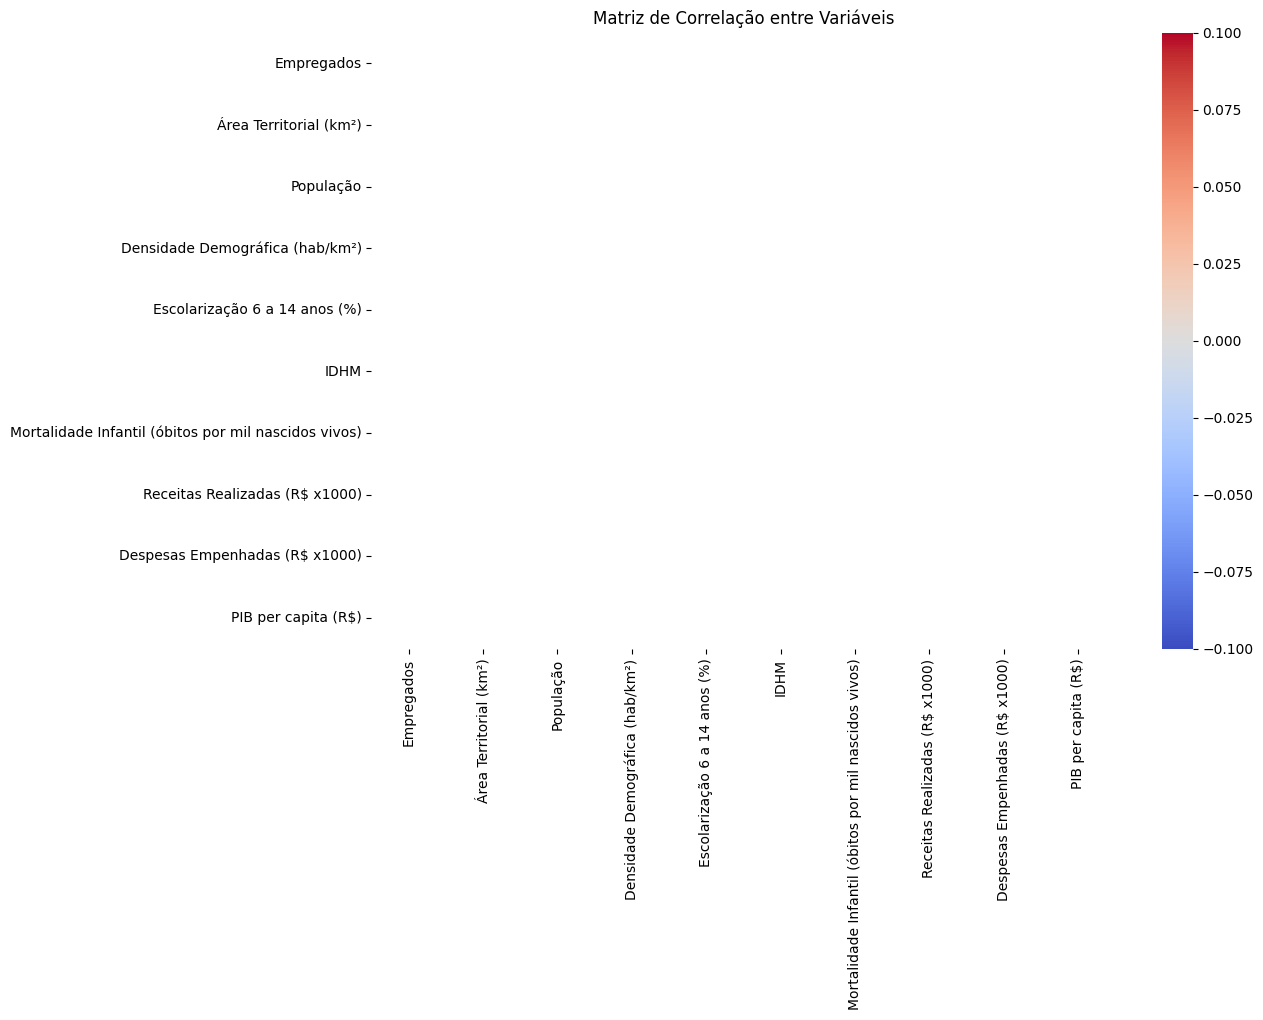

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

### Ariquemes

Informações por Cidades e Estados - Instituto Brasileiro de Geografia e Estatística

- **Ariquemes**
- **Prefeito:** CARLA GONÇALVES REZENDE [2021]
- **Gentílico:** ariquemense
- **Área Territorial:** 4.426,571 km² [2022]
- **População residente:** 96.833 pessoas [2022]
- **Densidade demográfica:** 21,88 hab/km² [2022]
- **Escolarização 6 a 14 anos:** 97,2% [2010]
- **IDHM Índice de desenvolvimento humano municipal:** 0,702 [2010]
- **Mortalidade infantil:** 7,3 óbitos por mil nascidos vivos [2020]
- **Receitas realizadas:** 235.252,82 R$ (×1000) [2017]
- **Despesas empenhadas:** 198.489,65 R$ (×1000) [2017]
- **PIB per capita:** 28.878,27 R$ [2021]

### Cabixi

Informações por Cidades e Estados - Instituto Brasileiro de Geografia e Estatística

- **Cabixi**
- **Prefeito:** IZAEL DIAS MOREIRA [2021]
- **Gentílico:** cabixiense
- **Área Territorial:** 1.314,352 km² [2022]
- **População residente:** 5.351 pessoas [2022]
- **Densidade demográfica:** 4,07 hab/km² [2022]
- **Escolarização 6 a 14 anos:** 98,1% [2010]
- **IDHM Índice de desenvolvimento humano municipal:** 0,650 [2010]
- **Mortalidade infantil:** 28,99 óbitos por mil nascidos vivos [2020]
- **Receitas realizadas:** 21.441,70 R$ (×1000) [2017]
- **Despesas empenhadas:** 19.269,95 R$ (×1000) [2017]
- **PIB per capita:** 47.051,83 R$ [2021]

### Cacoal

Informações por Cidades e Estados - Instituto Brasileiro de Geografia e Estatística

- **Cacoal**
- **Prefeito:** ADAILTON ANTUNES FERREIRA [2021]
- **Gentílico:** cacoalense
- **Área Territorial:** 3.793,000 km² [2022]
- **População residente:** 86.887 pessoas [2022]
- **Densidade demográfica:** 22,91 hab/km² [2022]
- **Escolarização 6 a 14 anos:** 97,6% [2010]
- **IDHM Índice de desenvolvimento humano municipal:** 0,718 [2010]
- **Mortalidade infantil:** 16,6 óbitos por mil nascidos vivos [2020]
- **Receitas realizadas:** 178.701,03 R$ (×1000) [2017]
- **Despesas empenhadas:** 172.804,94 R$ (×1000) [2017]
- **PIB per capita:** 32.313,26 R$ [2021]

### Cerejeiras

Informações por Cidades e Estados - Instituto Brasileiro de Geografia e Estatística

- **Cerejeiras**
- **Prefeito:** LISETE MARTH [2021]
- **Gentílico:** cerejeirense
- **Área Territorial:** 2.783,300 km² [2022]
- **População residente:** 15.890 pessoas [2022]
- **Densidade demográfica:** 5,71 hab/km² [2022]
- **Escolarização 6 a 14 anos:** 98,5% [2010]
- **IDHM Índice de desenvolvimento humano municipal:** 0,692 [2010]
- **Mortalidade infantil:** 7,43 óbitos por mil nascidos vivos [2020]
- **Receitas realizadas:** 48.054,32 R$ (×1000) [2017]
- **Despesas empenhadas:** 42.293,05 R$ (×1000) [2017]
- **PIB per capita:** 46.185,81 R$ [2021]

# Criando os DataFrames para os dados e cruzando os dados.

### Criando e Cruzando dados

In [2]:
import pandas as pd

# Dados de emprego dos municípios
dados_emprego = {
    'Municipio': ['110001', '110002', '110003', '110004', '110005'],
    'Empregados': [2631, 18378, 652, 18091, 2564]
}

# Dados municipais detalhados
dados_municipais = {
    'Municipio': ['110001', '110002', '110003', '110004', '110005'],
    'Nome': [
        'Alta Floresta D\'Oeste', 'Ariquemes', 'Cabixi', 'Cacoal', 'Cerejeiras'
    ],
    'Prefeito': [
        'GIOVAN DAMO [2021]', 'CARLA GONÇALVES REZENDE [2021]',
        'IZAEL DIAS MOREIRA [2021]', 'ADAILTON ANTUNES FERREIRA [2021]',
        'LISETE MARTH [2021]'
    ],
    'Gentilico': [
        'alta-florense', 'ariquemense', 'cabixiense', 'cacoalense', 'cerejeirense'
    ],
    'Area_Territorial_km2': [7067.127, 4426.571, 1314.352, 3793.000, 2783.300],
    'Populacao_residente': [21494, 96833, 5351, 86887, 15890],
    'Densidade_demografica_hab_km2': [3.04, 21.88, 4.07, 22.91, 5.71],
    'Escolarizacao_6_a_14_anos': [95.7, 97.2, 98.1, 97.6, 98.5],
    'IDHM': [0.641, 0.702, 0.650, 0.718, 0.692],
    'Mortalidade_infantil_obitos_por_mil': [6.01, 7.3, 28.99, 16.6, 7.43],
    'Receitas_realizadas_1000R$': [61193.26, 235252.82, 21441.70, 178701.03, 48054.32],
    'Despesas_empenhadas_1000R$': [63500.28, 198489.65, 19269.95, 172804.94, 42293.05],
    'PIB_per_capita_R$': [32619.88, 28878.27, 47051.83, 32313.26, 46185.81]
}

# Criando os DataFrames
df_emprego = pd.DataFrame(dados_emprego)
df_municipais = pd.DataFrame(dados_municipais)

#cruzar os dados de emprego com as informações municipais
df_cruzado = pd.merge(df_emprego, df_municipais, on='Municipio')

In [ ]:
print(df_cruzado)

  Municipio  Empregados                   Nome  \
0    110001        2631  Alta Floresta D'Oeste   
1    110002       18378              Ariquemes   
2    110003         652                 Cabixi   
3    110004       18091                 Cacoal   
4    110005        2564             Cerejeiras   

                           Prefeito      Gentilico  Area_Territorial_km2  \
0                GIOVAN DAMO [2021]  alta-florense              7067.127   
1    CARLA GONÇALVES REZENDE [2021]    ariquemense              4426.571   
2         IZAEL DIAS MOREIRA [2021]     cabixiense              1314.352   
3  ADAILTON ANTUNES FERREIRA [2021]     cacoalense              3793.000   
4               LISETE MARTH [2021]   cerejeirense              2783.300   

   Populacao_residente  Densidade_demografica_hab_km2  \
0                21494                           3.04   
1                96833                          21.88   
2                 5351                           4.07   
3             

###Calculando estatísticas descritivas

In [ ]:
desc_stats = df_cruzado.describe()

print(desc_stats)

         Empregados  Area_Territorial_km2  Populacao_residente  \
count      5.000000               5.00000              5.00000   
mean    8463.200000            3876.87000          45291.00000   
std     8955.832664            2135.96225          43048.59054   
min      652.000000            1314.35200           5351.00000   
25%     2564.000000            2783.30000          15890.00000   
50%     2631.000000            3793.00000          21494.00000   
75%    18091.000000            4426.57100          86887.00000   
max    18378.000000            7067.12700          96833.00000   

       Densidade_demografica_hab_km2  Escolarizacao_6_a_14_anos      IDHM  \
count                       5.000000                   5.000000  5.000000   
mean                       11.522000                  97.420000  0.680600   
std                         9.977859                   1.080278  0.033508   
min                         3.040000                  95.700000  0.641000   
25%                 

### Matriz de Correlação

In [ ]:
correlation_matrix = df_cruzado.corr()

print("Matriz de Correlação:")
print(correlation_matrix)

Matriz de Correlação:
                                     Empregados  Area_Territorial_km2  \
Empregados                             1.000000              0.163414   
Area_Territorial_km2                   0.163414              1.000000   
Populacao_residente                    0.995833              0.226820   
Densidade_demografica_hab_km2          0.991223              0.036723   
Escolarizacao_6_a_14_anos             -0.054255             -0.926012   
IDHM                                   0.812232             -0.180800   
Mortalidade_infantil_obitos_por_mil   -0.209261             -0.727299   
Receitas_realizadas_1000R$             0.975912              0.254781   
Despesas_empenhadas_1000R$             0.987346              0.291631   
PIB_per_capita_R$                     -0.761027             -0.738053   

                                     Populacao_residente  \
Empregados                                      0.995833   
Area_Territorial_km2                            0.2268

<ipython-input-23-cb22763ab99c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cruzado.corr()


### Matriz de Correlação entre Variáveis

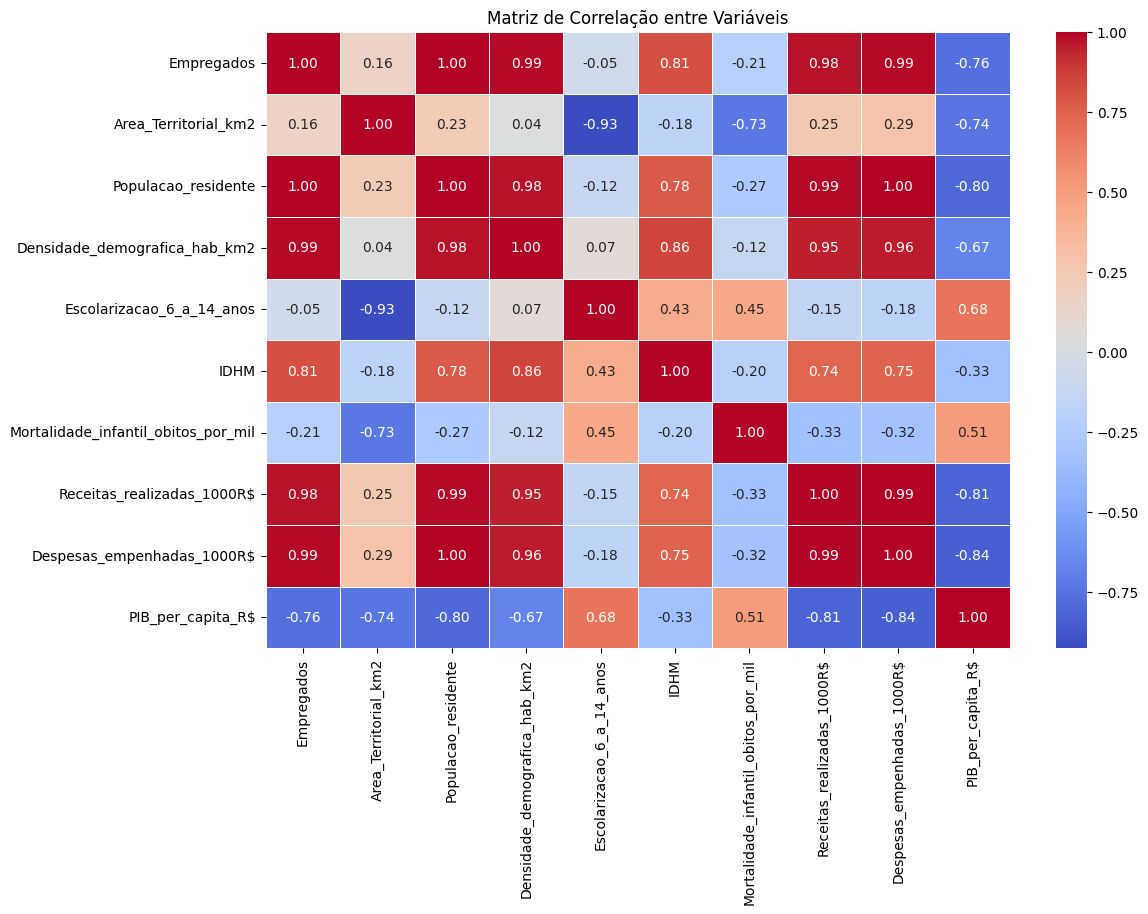

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

### Distribuição

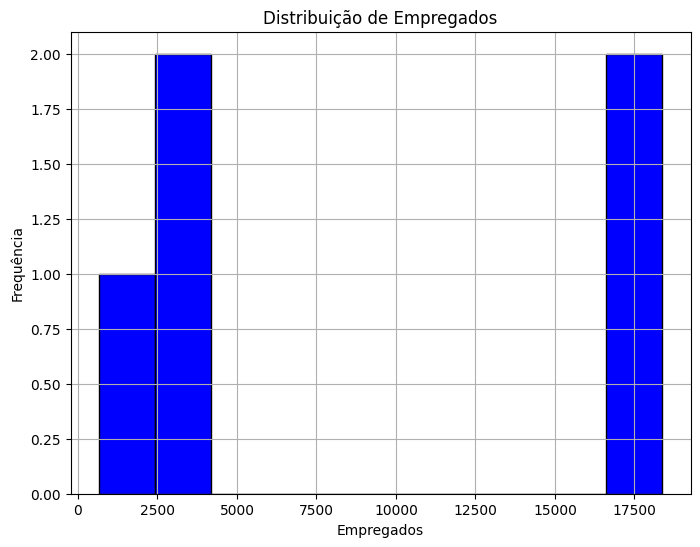

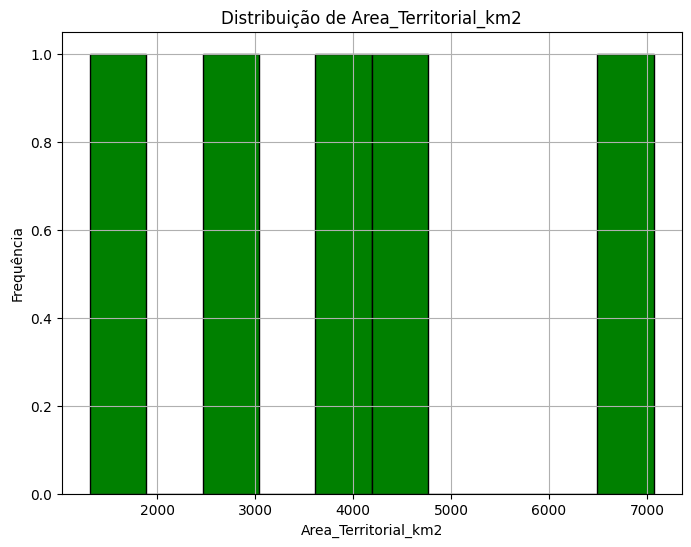

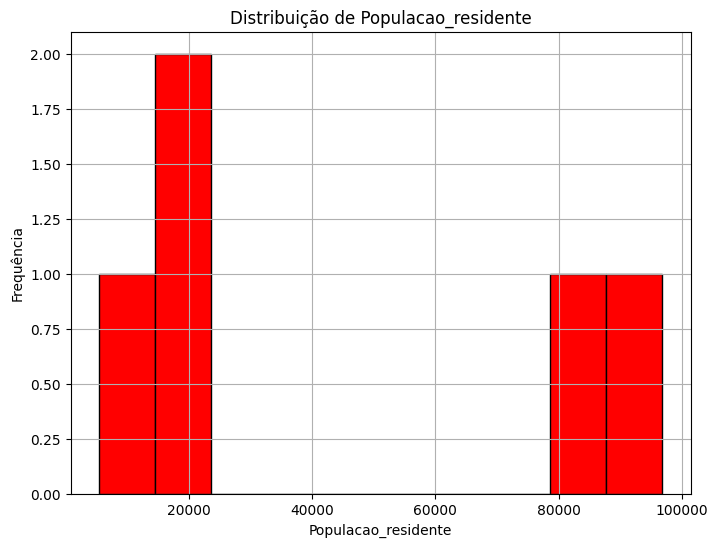

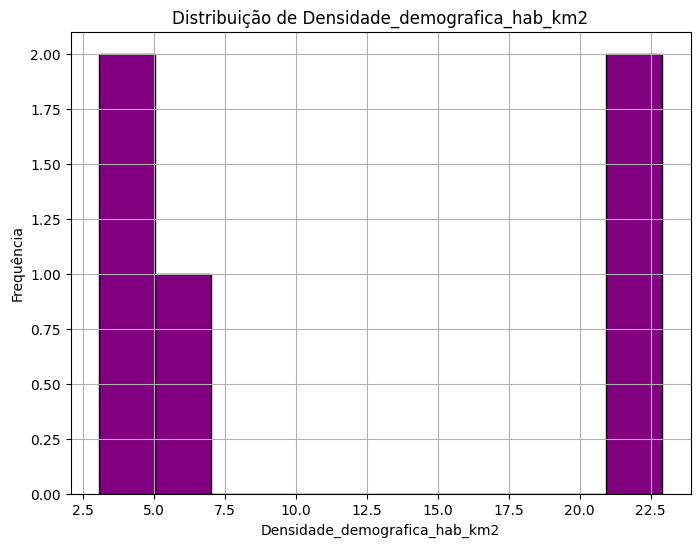

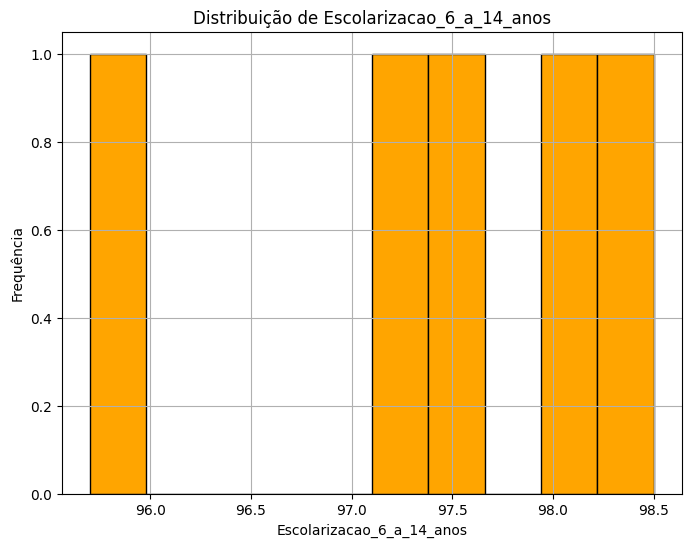

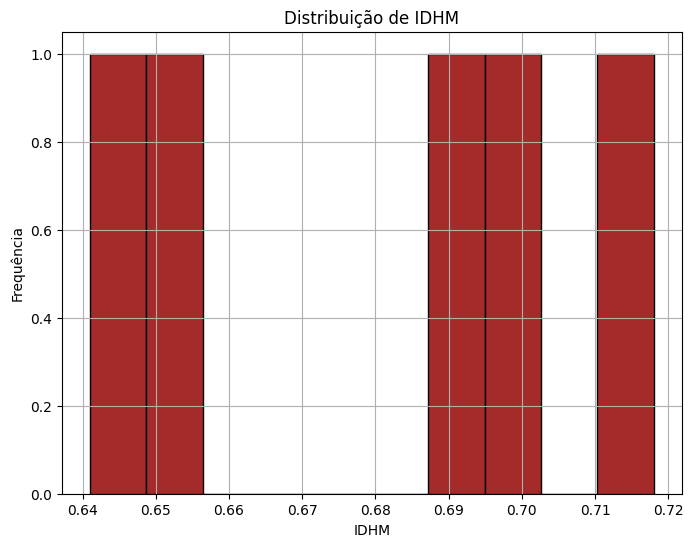

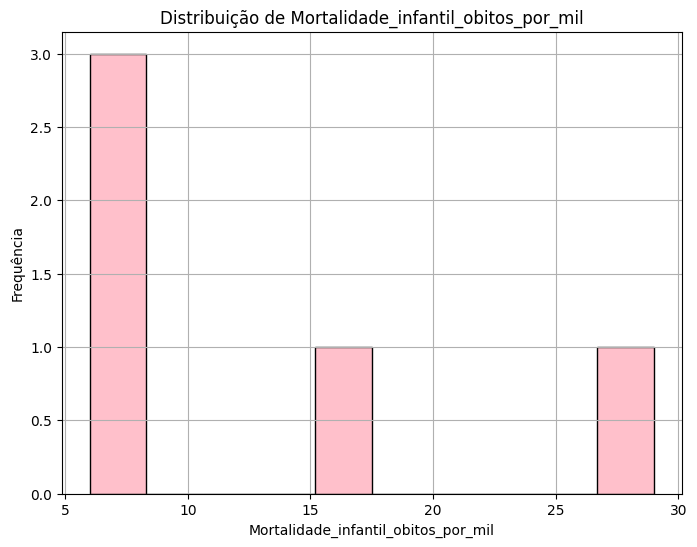

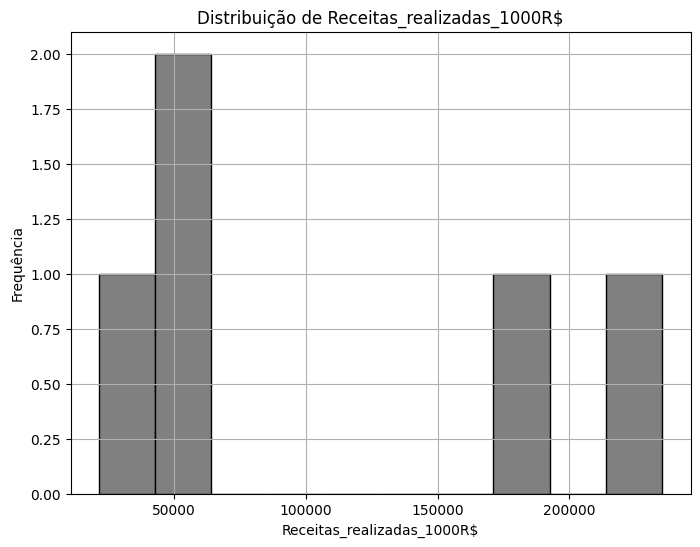

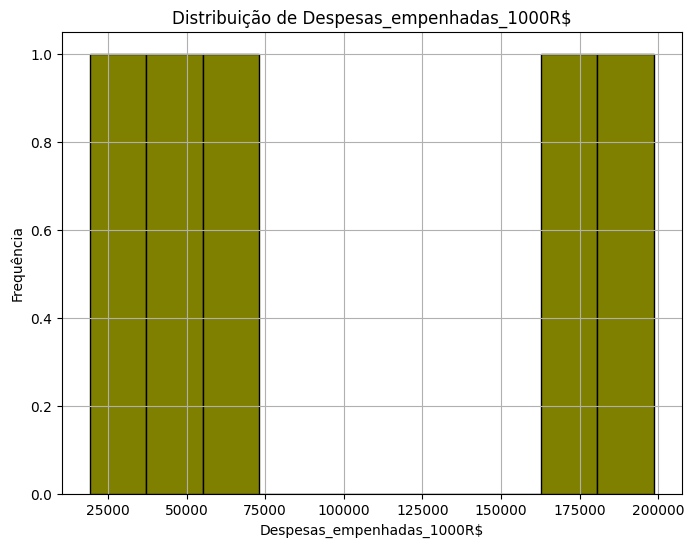

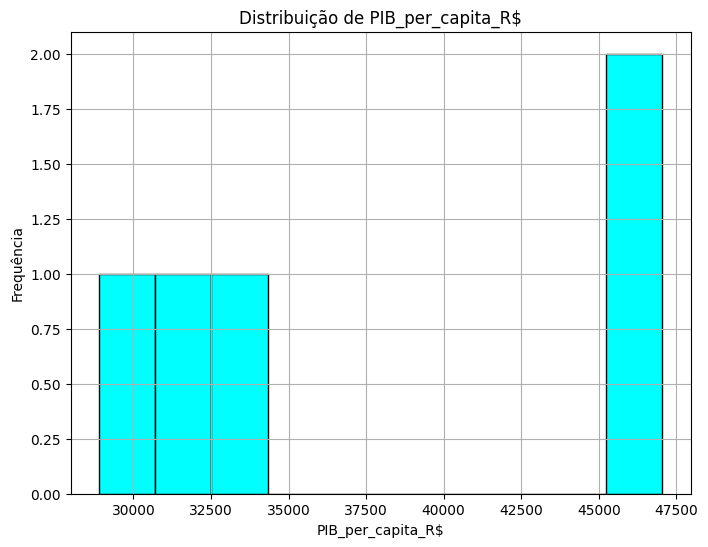

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

numeric_columns = df_cruzado.select_dtypes(include=['int64', 'float64']).columns

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Gerar histogramas para cada coluna numérica
for i, column in enumerate(numeric_columns):
    plt.figure(figsize=(8, 6))
    # Escolha de cor do array 'colors' baseada no índice 'i'
    plt.hist(df_cruzado[column], bins=10, color=colors[i % len(colors)], edgecolor='black')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()


### Análise de Outliers

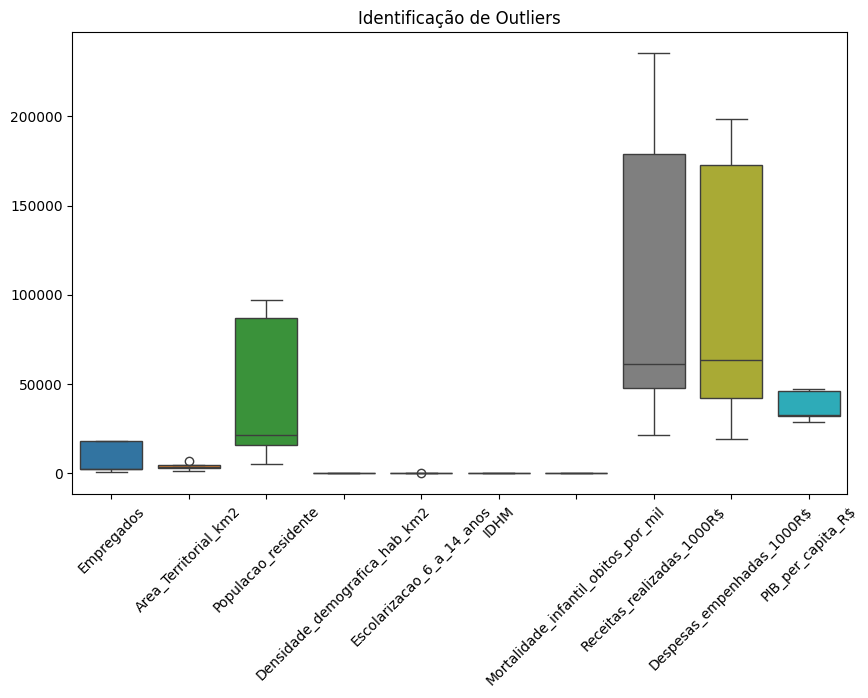

In [ ]:
import seaborn as sns

# Visualizar boxplots para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cruzado.select_dtypes(include=['int64', 'float64']))
plt.title('Identificação de Outliers')
plt.xticks(rotation=45)
plt.show()


### Análise de Variáveis Categóricas

In [ ]:
#colunas categóricas
categorical_columns = df_cruzado.select_dtypes(include=['object']).columns

# Contagem de frequência para variáveis categóricas
for column in categorical_columns:
    print(df_cruzado[column].value_counts())


110001    1
110002    1
110003    1
110004    1
110005    1
Name: Municipio, dtype: int64
Alta Floresta D'Oeste    1
Ariquemes                1
Cabixi                   1
Cacoal                   1
Cerejeiras               1
Name: Nome, dtype: int64
GIOVAN DAMO [2021]                  1
CARLA GONÇALVES REZENDE [2021]      1
IZAEL DIAS MOREIRA [2021]           1
ADAILTON ANTUNES FERREIRA [2021]    1
LISETE MARTH [2021]                 1
Name: Prefeito, dtype: int64
alta-florense    1
ariquemense      1
cabixiense       1
cacoalense       1
cerejeirense     1
Name: Gentilico, dtype: int64


### Análise de Clusterização

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


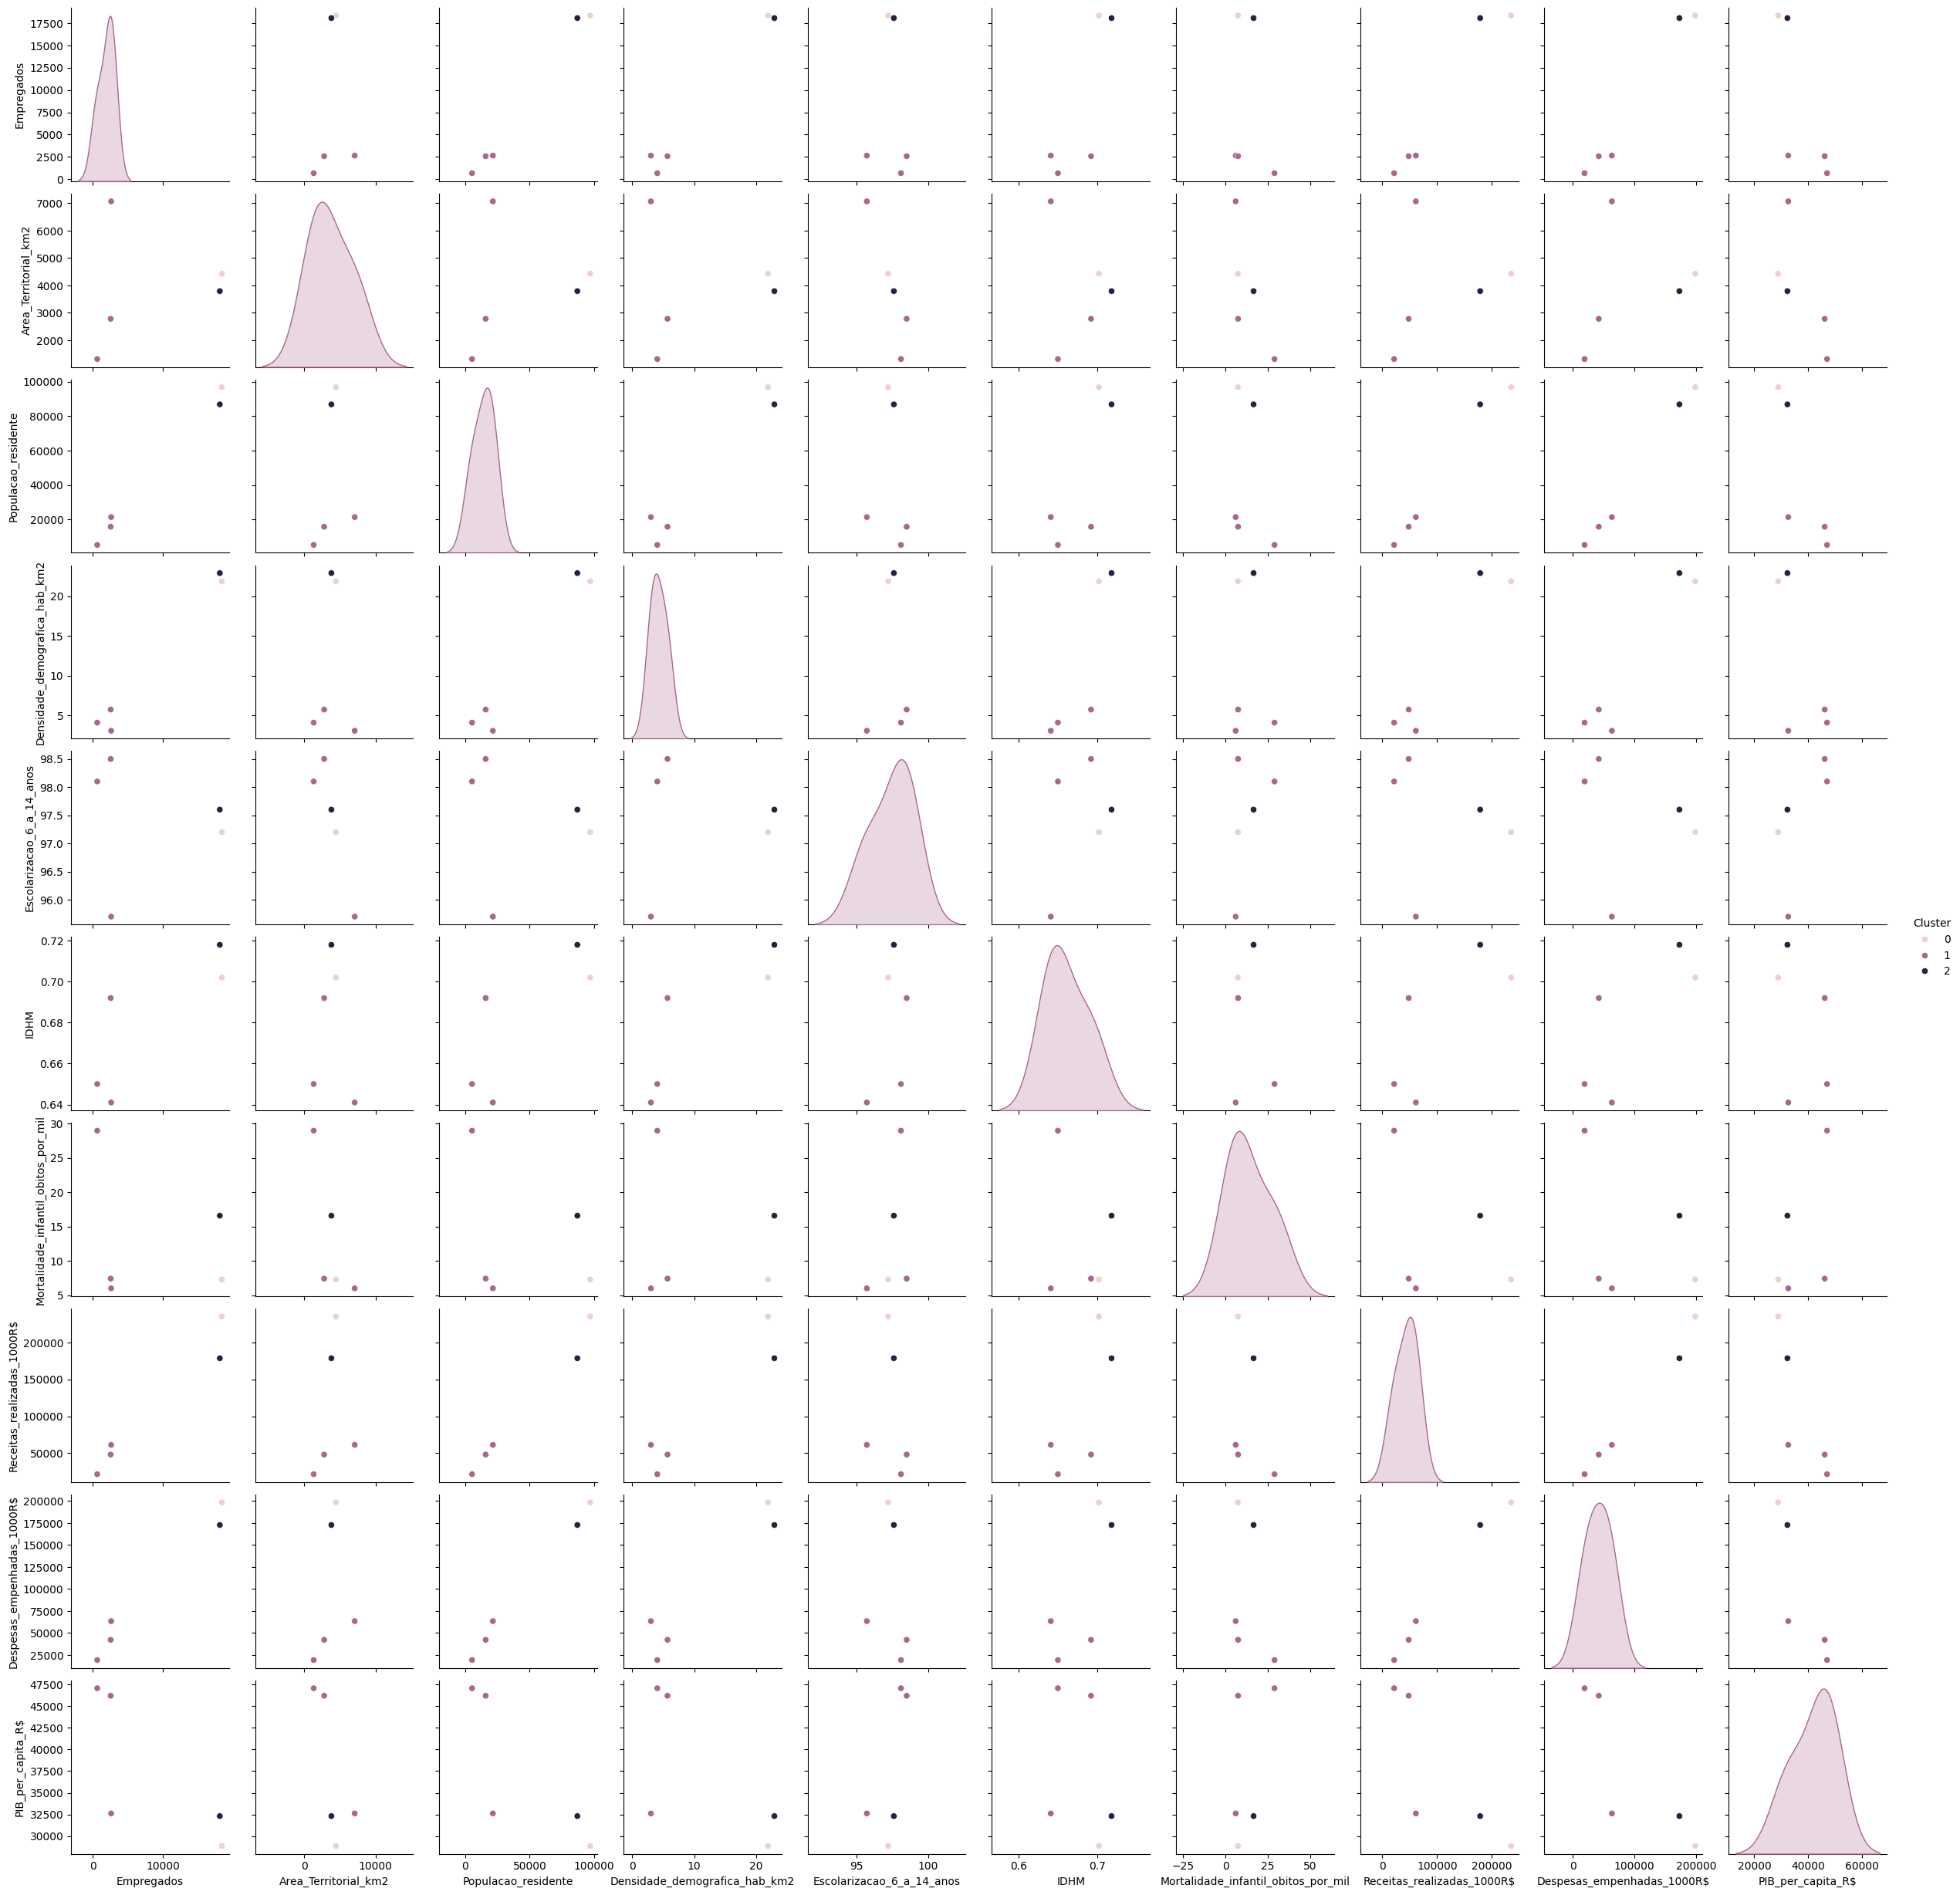

In [ ]:
from sklearn.cluster import KMeans


X = df_cruzado.select_dtypes(include=['int64', 'float64'])

k = 3


kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

df_cruzado['Cluster'] = kmeans.labels_

# Visualizar os clusters
sns.pairplot(df_cruzado, hue='Cluster')
plt.show()


### Análise de Séries Temporais

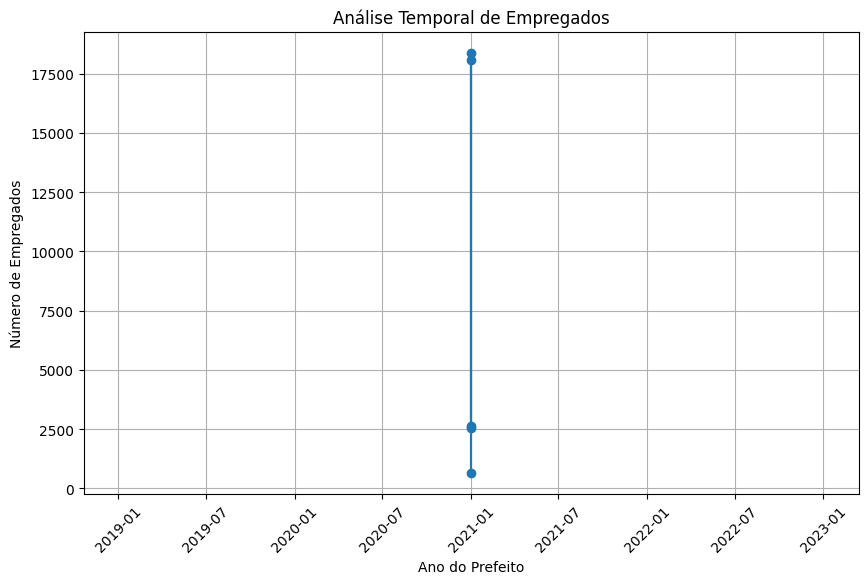

In [ ]:
import matplotlib.pyplot as plt

# Converter 'Prefeito' para o tipo de dados de data
df_cruzado['Prefeito'] = pd.to_datetime(df_cruzado['Prefeito'].str.extract(r'\[(\d{4})\]')[0], format='%Y')

# Classificar o dataframe por datas (anos dos prefeitos)
df_cruzado.sort_values(by='Prefeito', inplace=True)

# Plotar os dados
plt.figure(figsize=(10, 6))
plt.plot(df_cruzado['Prefeito'], df_cruzado['Empregados'], marker='o')
plt.title('Análise Temporal de Empregados')
plt.xlabel('Ano do Prefeito')
plt.ylabel('Número de Empregados')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Análise de Regressão

In [ ]:
print(df_cruzado)


  Municipio  Empregados                   Nome   Prefeito      Gentilico  \
0    110001        2631  Alta Floresta D'Oeste 2021-01-01  alta-florense   
1    110002       18378              Ariquemes 2021-01-01    ariquemense   
2    110003         652                 Cabixi 2021-01-01     cabixiense   
3    110004       18091                 Cacoal 2021-01-01     cacoalense   
4    110005        2564             Cerejeiras 2021-01-01   cerejeirense   

   Area_Territorial_km2  Populacao_residente  Densidade_demografica_hab_km2  \
0              7067.127                21494                           3.04   
1              4426.571                96833                          21.88   
2              1314.352                 5351                           4.07   
3              3793.000                86887                          22.91   
4              2783.300                15890                           5.71   

   Escolarizacao_6_a_14_anos   IDHM  Mortalidade_infantil_obitos_por

##População Residente (Populacao_residente)

In [ ]:
import statsmodels.api as sm

# Adicionar uma constante ao dataframe para o termo de interceptação
X_population = sm.add_constant(df_cruzado['Populacao_residente'])
Y_population = df_cruzado['Empregados']

# Ajustar o modelo de regressão
model_population = sm.OLS(Y_population, X_population).fit()

# Sumário do modelo
print(model_population.summary())


                            OLS Regression Results                            
Dep. Variable:             Empregados   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     357.7
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           0.000323
Time:                        21:07:36   Log-Likelihood:                -40.064
No. Observations:                   5   AIC:                             84.13
Df Residuals:                       3   BIC:                             83.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -919.8770    

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


##PIB per capita (PIB_per_capita_R$)

In [ ]:
# Adicionar uma constante ao dataframe para o termo de interceptação
X_pib = sm.add_constant(df_cruzado['PIB_per_capita_R$'])
Y_pib = df_cruzado['Empregados']

# Ajustar o modelo de regressão
model_pib = sm.OLS(Y_pib, X_pib).fit()

# Sumário do modelo
print(model_pib.summary())


                            OLS Regression Results                            
Dep. Variable:             Empregados   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4.129
Date:                Wed, 07 Feb 2024   Prob (F-statistic):              0.135
Time:                        21:07:39   Log-Likelihood:                -49.873
No. Observations:                   5   AIC:                             103.7
Df Residuals:                       3   BIC:                             103.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.832e+04    1.5e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Área Territorial (Area_Territorial_km2):


In [ ]:
# Adicionar uma constante ao dataframe para o termo de interceptação
X_area = sm.add_constant(df_cruzado['Area_Territorial_km2'])
Y_area = df_cruzado['Empregados']

# Ajustar o modelo de regressão
model_area = sm.OLS(Y_area, X_area).fit()

# Sumário do modelo
print(model_area.summary())


                            OLS Regression Results                            
Dep. Variable:             Empregados   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.298
Method:                 Least Squares   F-statistic:                   0.08231
Date:                Wed, 07 Feb 2024   Prob (F-statistic):              0.793
Time:                        21:07:41   Log-Likelihood:                -51.969
No. Observations:                   5   AIC:                             107.9
Df Residuals:                       3   BIC:                             107.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5806.8628 

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


##Densidade Demográfica (Densidade_demografica_hab_km2)

In [ ]:
# Adicionar uma constante ao dataframe para o termo de interceptação
X_density = sm.add_constant(df_cruzado['Densidade_demografica_hab_km2'])
Y_density = df_cruzado['Empregados']

# Ajustar o modelo de regressão
model_density = sm.OLS(Y_density, X_density).fit()

# Sumário do modelo
print(model_density.summary())


                            OLS Regression Results                            
Dep. Variable:             Empregados   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           0.000986
Time:                        21:07:44   Log-Likelihood:                -41.920
No. Observations:                   5   AIC:                             87.84
Df Residuals:                       3   BIC:                             87.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# Interpretação dos Resultados

# Interpretação dos Resultados

A análise dos dados municipais em combinação com os dados de emprego fornece uma visão abrangente das características e variações entre os municípios da Região Norte. Abaixo, apresentamos uma interpretação detalhada dos resultados obtidos através das análises descritivas, de correlação, distribuição, análise de variáveis categóricas, clusterização, análises temporais, regressões e outliers.

## Análise Descritiva das Variáveis Numéricas

- **Empregados**: Observa-se uma média de 8.463 empregados, com um desvio padrão significativo, indicando variação considerável no número de empregados entre municípios. A discrepância entre o mínimo e o máximo enfatiza a diferença na empregabilidade.
  
- **Área Territorial (km²)**: A variação no tamanho dos municípios é acentuada, com uma média de área territorial significativa, sugerindo uma grande diversidade geográfica.
  
- **População Residente**: A dispersão na população residente aponta para diferenças significativas no tamanho das populações municipais.
  
- **Densidade Demográfica (hab/km²)**: A variação da densidade demográfica destaca a baixa densidade populacional em comparação com regiões metropolitanas.
  
- **Escolarização (6 a 14 anos)**: A alta média de escolarização indica um bom acesso à educação básica.
  
- **IDHM**: O IDHM médio situa-se no espectro médio, com uma variação que sugere potencial para melhorias no desenvolvimento humano.
  
- **Mortalidade Infantil**: A variação na mortalidade infantil indica diferenças significativas na saúde infantil entre os municípios.
  
- **Receitas Realizadas e Despesas Empenhadas**: Aproximação entre receitas e despesas sugere uma gestão fiscal tendente ao equilíbrio.
  
- **PIB per capita (R$)**: A variabilidade do PIB per capita ressalta disparidades econômicas entre os municípios.

### Conclusão e Insights

A análise revela uma heterogeneidade marcante entre os municípios em termos de emprego, geografia, população, desenvolvimento e economia. A alta escolarização em contraste com o IDHM médio sugere um potencial inexplorado de desenvolvimento humano. A variação no PIB per capita e na mortalidade infantil destaca a necessidade de focar esforços de desenvolvimento onde mais necessários.

## Matriz de Correlação e Interpretação dos Resultados Significativos

A matriz de correlação destaca correlações fortes e significativas entre as variáveis, como a quase perfeita correlação entre empregados e população residente, e uma correlação muito alta entre empregados e densidade demográfica. Estes resultados sugerem que municípios maiores ou mais densamente povoados tendem a ter mais empregos e potencialmente melhores condições de vida (indicado pela correlação com IDHM). No entanto, é crucial notar que correlação não implica causalidade e que análises mais detalhadas são necessárias para compreender completamente essas dinâmicas.

### Gráficos de Distribuição e Análise

- **Empregados e População Residente**: A distribuição bimodal sugere a existência de dois grupos distintos de municípios em termos de empregabilidade e tamanho da população.
  
- **Área Territorial e Densidade Demográfica**: As distribuições indicam uma grande variação no tamanho dos municípios e na densidade populacional, com alguns municípios apresentando densidades significativamente mais altas.
  
- **Escolarização, IDHM e Mortalidade Infantil**: Altas taxas de escolarização e uma distribuição uniforme do IDHM contrastam com a variação nas taxas de mortalidade infantil, apontando para disparidades na saúde infantil.
  
- **Receitas e Despesas**: A distribuição das receitas e despesas revela uma gestão fiscal variada, com alguns municípios apresentando maior capacidade econômica.

### Análise de Variáveis Categóricas e Clusterização

Cada município possui características únicas, como evidenciado pela análise de variáveis categóricas. A clusterização sugere agrupamentos com base em características compartilhadas, mas uma análise mais profunda seria necessária para tirar conclusões definitivas.

### Análise Temporal e Regressão

A análise temporal dos dados de emprego, embora limitada pela concentração dos dados em um único ponto no tempo (2021), sugere a necessidade de dados mais distribuídos temporalmente para uma análise efetiva. As regressões OLS, apesar de mostrarem relações estatísticas significativas entre algumas variáveis e o número de empregados, são limitadas pelo pequeno tamanho da amostra, o que afeta a confiabilidade dos resultados. A alta correlação entre densidade demográfica e número de empregados destaca uma relação potencialmente influente, mas a falta de significância estatística em outras regressões, como com PIB per capita e área territorial, aponta para a complexidade dos fatores em jogo e a necessidade de cautela na interpretação desses resultados.

# Conclusão Geral

A análise abrangente dos dados municipais, combinada com os dados de emprego da Região Norte, revelou um panorama complexo e heterogêneo das características e variações entre os municípios. Através da análise descritiva, da interpretação da matriz de correlação, das distribuições variadas e da análise de variáveis categóricas, foi possível obter uma compreensão profunda das dinâmicas socioeconômicas e demográficas regionais.

**Principais Descobertas:**

- A **heterogeneidade** nos municípios é marcante em termos de emprego, dimensões geográficas, população, desenvolvimento humano e economia. Isso sugere que as políticas públicas e os esforços de desenvolvimento devem ser altamente personalizados para atender às necessidades específicas de cada município.
  
- A existência de **correlações fortes** entre o número de empregados e a população residente, bem como entre empregados e densidade demográfica, destaca a interdependência entre tamanho da população, densidade demográfica e empregabilidade. Municípios maiores e/ou mais densamente povoados tendem a oferecer mais oportunidades de emprego, mas também enfrentam desafios únicos relacionados à gestão de recursos e serviços.

- As **altas taxas de escolarização** e a distribuição do **Índice de Desenvolvimento Humano Municipal (IDHM)** sugerem um bom acesso à educação básica e níveis razoáveis de desenvolvimento humano. No entanto, a variação no PIB per capita e nas taxas de mortalidade infantil aponta para disparidades econômicas e de saúde que requerem atenção.

- As **distribuições variadas** de empregados, população residente, densidade demográfica, escolarização, IDHM, mortalidade infantil, receitas realizadas e despesas empenhadas revelam padrões complexos que refletem a diversidade de situações entre os municípios. A distribuição bimodal em algumas variáveis sugere a existência de dois ou mais grupos distintos de municípios com características específicas.

- A análise de **variáveis categóricas** confirmou a singularidade de cada município em termos de nomes, prefeitos e gentílicos, reforçando a necessidade de abordagens personalizadas no planejamento e implementação de políticas.

Os insights obtidos através desta análise oferecem uma base sólida para direcionar esforços de desenvolvimento econômico e social de maneira mais eficaz, com foco em áreas que necessitam de maior apoio e investimento. É evidente a necessidade de políticas públicas e intervenções que considerem as particularidades de cada município, visando não apenas o crescimento econômico, mas também o avanço no desenvolvimento humano, na redução das desigualdades e na melhoria da qualidade de vida dos residentes. A realização de análises adicionais, especialmente aquelas que podem oferecer insights sobre a causalidade e mecanismos subjacentes às correlações observadas, será crucial para elaborar estratégias de desenvolvimento mais informadas e eficazes para a Região Norte.
